# NLP for Data Science using Spacy & Co.

Many language processing tasks are already covered in [Spacy 101 - Everything you need to know](https://spacy.io/usage/spacy-101).

Spacy is an open source library made by the company [explosion.ai](https://explosion.ai/).

## Lemmatization, Part-of-speech tagging, and dependency parsing

Many language analysis tasks involve a whole pipeline of models. Spacy models are trained to perform a combination of tasks, which is also a source of robustness of these models. When using these models, you can access multiple features produced by the model pipeline and use them for your own tasks.

In [25]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

pd.DataFrame(((token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop) for token in doc),
             columns="Text	Lemma	POS	Tag	Dep	Shape	alpha	stop".split())


,Text,Lemma,POS,Tag,Dep,Shape,alpha,stop
0,Apple,Apple,PROPN,NNP,nsubj,Xxxxx,True,False
1,is,be,AUX,VBZ,aux,xx,True,True
2,looking,look,VERB,VBG,ROOT,xxxx,True,False
3,at,at,ADP,IN,prep,xx,True,True
4,buying,buy,VERB,VBG,pcomp,xxxx,True,False
5,U.K.,U.K.,PROPN,NNP,dobj,X.X.,False,False
6,startup,startup,NOUN,NN,dep,xxxx,True,False
7,for,for,ADP,IN,prep,xxx,True,True
8,$,$,SYM,$,quantmod,$,False,False
9,1,1,NUM,CD,compound,d,False,False


## Named entity resolution (NER)

In [6]:
import spacy
from spacy import displacy
from IPython.display import HTML, Markdown
import pandas as pd

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

def make_ents():
  for ent in doc.ents:
      yield (ent.text, ent.start_char, ent.end_char, ent.label_)

display(pd.DataFrame(make_ents(), columns="entity start end type".split()))

# aside: some notebook TOC generators (e.g. Jupyter, but not Colab) pick up generated headings
display(Markdown("### Entity highlighting using displacy"))

HTML(displacy.render(doc,
                     #style='dep',
                     style='ent',
                     ))

,entity,start,end,type
0,Apple,0,5,ORG
1,U.K.,27,31,GPE
2,$1 billion,44,54,MONEY


### Entity highlighting using displacy

## Constituency Parsing

To generate the constituency tree, a more compehensive library is needed, constituent_treelib by Oren Halvani), that uses spacy as a feature extractor.

In [ ]:
#!pip install constituent-treelib

In [ ]:
from constituent_treelib import ConstituentTree, BracketedTree, Language, Structure

# Define the language for the sentence as well as for the spaCy and benepar models
language = Language.English

# Define which specific SpaCy model should be used (default is Medium)
spacy_model_size = ConstituentTree.SpacyModelSize.Medium

# Create the pipeline (note, the required models will be downloaded and installed automatically)
nlp = ConstituentTree.create_pipeline(language, spacy_model_size)

without_token_leaves = ConstituentTree(sentence, nlp, Structure.WithoutTokenLeaves)


[nltk_data] Downloading package benepar_en3 to /usr/share/nltk_data...
[nltk_data]   Package benepar_en3 is already up-to-date!


In [ ]:
# Raw sentence
sentence = 'You must construct additional pylons!'

In [ ]:

# Parsed sentence wrapped as a BracketedTree object
bracketed_tree_string = '(S (NP (PRP You)) (VP (MD must) (VP (VB construct) (NP (JJ additional) (NNS pylons)))) (. !))'
bracketed_sentence = BracketedTree(bracketed_tree_string)

In [ ]:
without_token_leaves = ConstituentTree(sentence, nlp, Structure.WithoutTokenLeaves)

#without_inner_postag_nodes = ConstituentTree(sentence, nlp, Structure.WithoutPostagNodes)

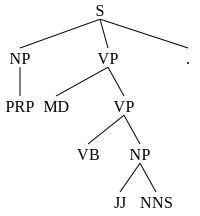

In [ ]:
without_token_leaves

In [ ]:
pos_phrases = without_token_leaves.extract_all_phrases()
pos_phrases

{'VP': ['must construct additional pylons', 'construct additional pylons'],
 'S': ['You must construct additional pylons !'],
 'NP': ['additional pylons']}